In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_boston

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
X=boston_df.drop('Price',axis=1)
Y=boston_df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)


In [12]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, Y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, Y_train)
train_score=lr.score(X_train, Y_train)
test_score=lr.score(X_test, Y_test)
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)
Ridge_train_score100 = rr100.score(X_train,Y_train)
Ridge_test_score100 = rr100.score(X_test, Y_test)

linear regression train score: 0.7170467166597749
linear regression test score: 0.589222384918251
ridge regression train score low alpha: 0.773012899349382
ridge regression test score low alpha: 0.5890993204933797
ridge regression train score high alpha: 0.7511219694364966
ridge regression test score high alpha: 0.5393206876381226


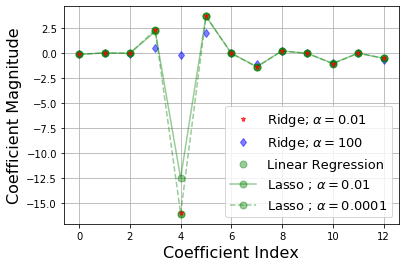

In [21]:
print( "linear regression train score:", train_score)
print( "linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.plot(lasso001.coef_,alpha=0.4,linestyle='-',marker='o',markersize=7,color='green',label=r'Lasso ; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.4,linestyle='--',marker='o',markersize=7,color='green',label=r'Lasso ; $\alpha = 0.0001$')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.grid()
plt.show()

In [17]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
train_score=lasso.score(X_train,Y_train)

In [19]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,Y_train)
train_score001=lasso001.score(X_train,Y_train)
test_score001=lasso001.score(X_test,Y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,Y_train)
train_score00001=lasso00001.score(X_train,Y_train)
test_score00001=lasso00001.score(X_test,Y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

training score for alpha=0.01: 0.7725642487734209
test score for alpha =0.01:  0.58499838480617
number of features used: for alpha =0.01: 13
